In [ ]:
import numpy as np
import gradio as gr
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check data size
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


0.0 2.365044290627876e-10
(10000, 784)


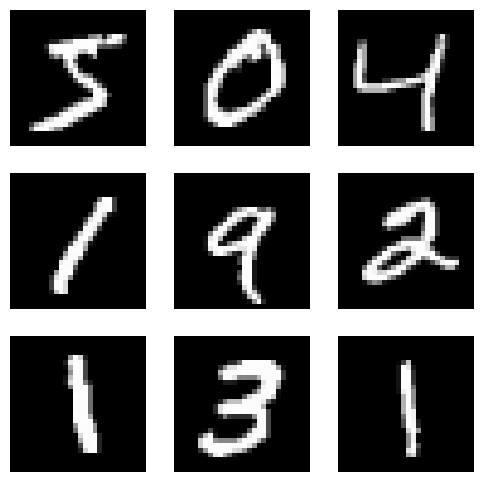

In [ ]:
# Normalize to [0,1]

x_train = x_train.reshape(60000, 784)/255.0
x_test = x_test.reshape(10000, 784)/255.0

print(x_train.min(), x_train.max())  # testing if the normalize succeeded
print(x_test.shape)

# Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

plt.figure(figsize=(6,6))
for i in range(9):
    img = x_train[i].reshape(28,28)  # reshape back to 28x28
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu",kernel_regularizer=regularizers.l2(1e-4)),   # hidden layer
    tf.keras.layers.Dropout(0.5), # 50% dropout

    tf.keras.layers.Dense(128, activation="relu" ,kernel_regularizer=regularizers.l2(1e-4)),   # hidden layer
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),   # hidden layer
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),   # hidden layer
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),   # hidden layer
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),   # hidden layer
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(10, activation="softmax")  # output layer
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model
history=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.4)

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2562 - loss: 2.0424 - val_accuracy: 0.7570 - val_loss: 0.7406
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7014 - loss: 0.9390 - val_accuracy: 0.9090 - val_loss: 0.4821
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8327 - loss: 0.6618 - val_accuracy: 0.9331 - val_loss: 0.3578
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8851 - loss: 0.5401 - val_accuracy: 0.9407 - val_loss: 0.3271
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8994 - loss: 0.5036 - val_accuracy: 0.9449 - val_loss: 0.3289


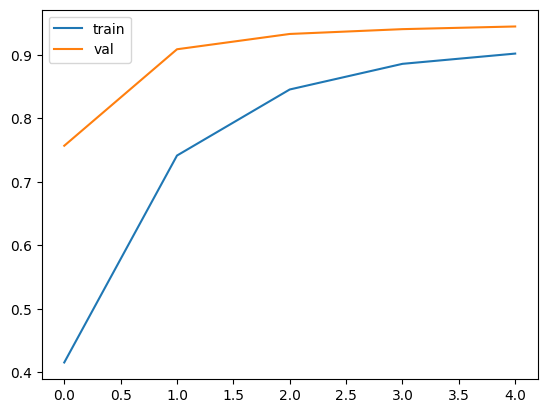

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

In [ ]:
def predict(img):
   # transfring the input image to numpy array
   imgArray=(img['composite'])
   imgArray=imgArray/255.0 # normilize
   imgArray=1.0-imgArray # invert colors

   imgArray = imgArray.reshape(-1, 28*28)

   preds=model.predict(imgArray,verbose=0)
   digit = int(np.argmax(preds, axis=1)[0])
   return digit

gr.Interface(
    fn=predict,
    inputs=gr.Sketchpad( type='numpy', image_mode='L',canvas_size=(28,28), brush=gr.Brush( colors=["#00000080"], color_mode="fixed" ,default_size=1)),
    outputs=gr.Textbox(),
).launch(debug=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f61512dff84952e27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
